In [1]:
import numpy as np
import cv2 as cv
import random
import matplotlib.pyplot as plt
dir='D:/Python/seg-data/data_MB/test'

In [2]:
data=np.load(dir+'/src/0.npy')
label=cv.imread(dir+'/labelV/0.png')

In [3]:
data=np.floor((data/(data.max()))*255)
data

array([[[  0.,   0.,   0., ..., 159., 157., 157.],
        [  0.,   0.,   0., ..., 159., 157., 156.],
        [  0.,   0.,   0., ..., 158., 159., 157.],
        ...,
        [168., 163., 164., ..., 176., 182., 186.],
        [165., 165., 166., ..., 182., 187., 186.],
        [163., 167., 167., ..., 187., 189., 188.]],

       [[  0.,   0.,   0., ..., 132., 133., 131.],
        [  0.,   0.,   0., ..., 133., 134., 130.],
        [  0.,   0.,   0., ..., 132., 135., 130.],
        ...,
        [155., 148., 154., ..., 160., 168., 174.],
        [153., 151., 153., ..., 166., 176., 178.],
        [152., 157., 160., ..., 174., 185., 184.]],

       [[  0.,   0.,   0., ...,  82.,  79.,  79.],
        [  0.,   0.,   0., ...,  83.,  80.,  79.],
        [  0.,   0.,   0., ...,  80.,  81.,  79.],
        ...,
        [ 96.,  90.,  95., ...,  97., 110., 114.],
        [ 94.,  93.,  93., ..., 104., 118., 113.],
        [ 92.,  95.,  93., ..., 112., 117., 114.]],

       [[  0.,   0.,   0., ...,  26.,

In [4]:
print(data.shape)

(4, 256, 256)


In [5]:
def flip(image,label,channel=4):
    
    channnels=np.zeros(image.shape)
    w=image.shape[1]
    center=((w-1)/2,(w-1)/2)
    randomInt2=random.randint(0,3)
    randomInt1=random.randint(-1,1)
    randomInt3=random.randint(-1,1)
    for i in range(channel):
        #print(channnels[i].shape)
        #plt.imshow(channnels[i])
        #plt.show()
        #print(channnels[i])
        channnels[i]=np.floor((image[i]/(image[i].max()))*255)
        channnels[i]=cv.flip(channnels[i],randomInt1)
        channnels[i]=cv.flip(channnels[i],randomInt3)
        
        parameters = cv.getRotationMatrix2D(center,randomInt2*90, 1)
        channnels[i] = cv.warpAffine(channnels[i], parameters, (w, w))
        
        #print(channnels[i])
        #plt.imshow(channnels[i])
        #plt.show()
    label=cv.flip(label,randomInt1)
    label=cv.flip(label,randomInt3)
    label=cv.warpAffine(label, parameters, (w, w))
    #plt.imshow(label)
    #plt.show()
    return channnels,label

In [6]:
tif,label=flip(data,label)

[[170. 172. 168. ... 153. 155. 153.]
 [169. 173. 162. ... 153. 153. 154.]
 [170. 167. 157. ... 155. 151. 156.]
 ...
 [141. 143. 142. ...   0.   0.   0.]
 [141. 142. 145. ...   0.   0.   0.]
 [141. 141. 144. ...   0.   0.   0.]]


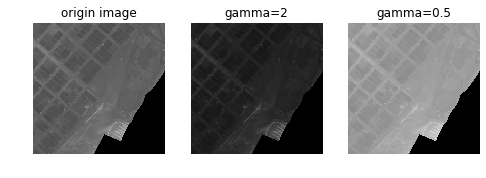

In [10]:
from skimage import data, exposure, img_as_float
import matplotlib.pyplot as plt
image =  img_as_float(tif[2])
image=np.floor((image/(image.max()))*255)
gam1= exposure.adjust_gamma(image, 2)
gam1=np.floor((gam1/(gam1.max()))*255)
gam2= exposure.adjust_gamma(image, 0.5)
gam2=np.floor((gam2/(gam2.max()))*255)
print(gam2)#调亮
plt.figure('adjust_gamma',figsize=(8,8))

plt.subplot(131)
plt.title('origin image')
plt.imshow(image,plt.cm.gray)
plt.axis('off')

plt.subplot(132)
plt.title('gamma=2')
plt.imshow(gam1,plt.cm.gray)
plt.axis('off')

plt.subplot(133)
plt.title('gamma=0.5')
plt.imshow(gam2,plt.cm.gray)
plt.axis('off')

plt.show()

In [ ]:
import cv2
import numpy as np

# 读取原图像
img = label
print(img.shape)
plt.imshow( img)
plt.show()

# 获取输入图像的信息，生成旋转操作所需的参数（padding: 指定零填充的宽度； canter: 指定旋转的轴心坐标）
h, w = img.shape[:2]
padding = (w - h) // 2
center = (w // 2, w // 2)

# 在原图像两边做对称的零填充，使得图片由矩形变为方形
img_padded = np.zeros(shape=(w, w, 3), dtype=np.uint8)
img_padded[padding:padding+h, :, :] = img
print(img_padded.shape)
plt.imshow( img_padded)
plt.show()
#cv2.imwrite("./img_padded.jpg", img_padded)

# 逆时针-90°(即顺时针90°)旋转填充后的方形图片
M = cv2.getRotationMatrix2D(center, -90, 1)
rotated_padded = cv2.warpAffine(img_padded, M, (w, w))
print(M)
plt.imshow(M)
plt.show()

#cv2.imwrite("./rotated_padded.jpg", rotated_padded)

# 从旋转后的图片中截取出我们需要的部分，作为最终的输出图像
output = rotated_padded[:, padding:padding+h, :]
print(output.shape)
plt.imshow( output)
plt.show()

#cv2.imwrite("./output.jpg", output)
